## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats

# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results)
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
len(mouse_study["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = mouse_study.loc[mouse_study.duplicated(["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean = mouse_study[mouse_study["Mouse ID"].isin(duplicate_mice)==False]
mouse_study_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study_clean["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.

by_regimen = mouse_study_clean.groupby("Drug Regimen")

mean = by_regimen["Tumor Volume (mm3)"].mean()
median = by_regimen["Tumor Volume (mm3)"].median()
variance = by_regimen["Tumor Volume (mm3)"].var()
std = by_regimen["Tumor Volume (mm3)"].std()
sem = by_regimen["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean": mean,
                           "Median": median,
                           "Variance": variance,
                           "Standard Deviation": std,
                           "SEM": sem})

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.

summary_df = mouse_study_clean.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
})

summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

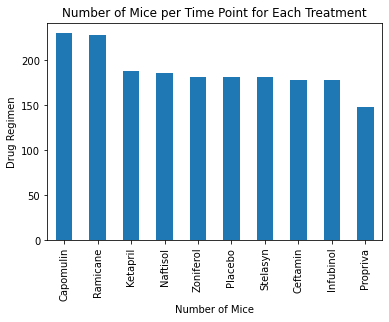

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

mice_per_treatment = mouse_study_clean["Drug Regimen"].value_counts()

mice_per_treatment.plot(kind="bar",
                       title="Number of Mice per Time Point for Each Treatment",
                       xlabel="Number of Mice",
                       ylabel="Drug Regimen")

plt.show()

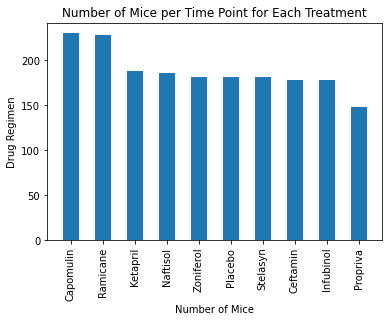

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

mice_per_treatment = mouse_study_clean["Drug Regimen"].value_counts()
x_axis = mice_per_treatment.index.values
y_axis = mice_per_treatment.values

plt.bar(
    x_axis,
    y_axis,
    width=0.5
)

# Title and axis labels
plt.title("Number of Mice per Time Point for Each Treatment")
plt.xlabel("Number of Mice")
plt.ylabel("Drug Regimen")

# Rotate x-axis labels
plt.xticks(rotation="vertical")

plt.show()

## Pie Plots

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_distribution = mouse_metadata.Sex.value_counts()
gender_distribution

Male      125
Female    124
Name: Sex, dtype: int64

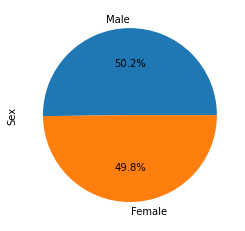

In [12]:
gender_distribution.plot(kind="pie", autopct="%1.1f%%")
plt.show()

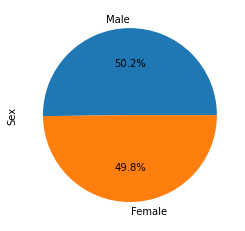

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_distribution = mouse_metadata.Sex.value_counts()

plt.pie(
    gender_distribution,
    labels=gender_distribution.index.values,
    autopct="%1.1f%%"
)

# Axis label
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot()

plt.show()

## Line and Scatter Plots

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_data = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"] == "Capomulin"]

# Show mice treated with Capomulin
capomulin_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


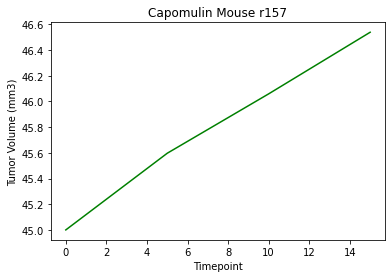

In [15]:
capomulin_mouse = capomulin_data.loc[capomulin_data["Mouse ID"] == "r157"]
x_axis = capomulin_mouse["Timepoint"]
y_axis = capomulin_mouse["Tumor Volume (mm3)"]

plt.plot(
    x_axis,
    y_axis,
    color="green"
)

# Set limitations
# plt.xlim(-1,16)
# plt.ylim(44.5,47)

# Title and axis labels
plt.title("Capomulin Mouse r157")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

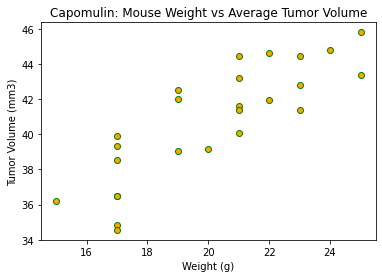

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_data = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"] == "Capomulin"]
capomulin_avg = capomulin_data.groupby(["Mouse ID"]).mean()
x_axis = capomulin_avg["Weight (g)"]
y_axis = capomulin_avg["Tumor Volume (mm3)"]

plt.scatter(
    x_axis,
    y_axis,
    marker="o",
    facecolor="orange",
    edgecolor="green"
)

# Set limitations
# plt.xlim(13,27)
# plt.ylim(33,47)

# Title and axis labels
plt.title("Capomulin: Mouse Weight vs Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

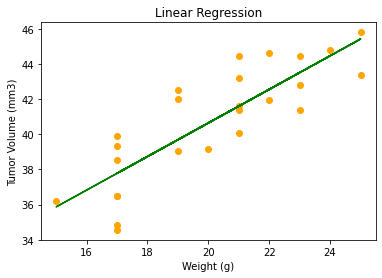

In [28]:
x_values = capomulin_avg["Weight (g)"]
y_values = capomulin_avg["Tumor Volume (mm3)"]

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scsatter plot
plt.scatter(
    x_values,
    y_values,
    color="orange"
)

# Add linear regression line to plot
plt.plot(
    x_values,
    regress_values,
    "r-",
    color="green"
)

# Title and axis labels
plt.title("Linear Regression")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [31]:
correlation = stats.pearsonr(x_values, y_values)
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.84
